In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import kurtosis

In [2]:
data=pd.read_excel('DS1_C5_S1_Car_Data_Challenge.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'DS1_C5_S1_Car_Data_Challenge.xlsx'

In [3]:
data

,Sl. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


# task 1

In [9]:
#manfacture provides the wide varity of cars and calculatethe mean median standard devation  cofficient of variance and 
#visually present the distrubation of displacement
x=data['Make'].dropna().value_counts()
x.head()

Suzuki      149
Hyundai     130
Mahindra    119
Tata        100
Toyota       82
Name: Make, dtype: int64

In [10]:
x=data.groupby('Make')[['Displacement','Fuel_Tank_Capacity_litre','City_Mileage_km_litre','Highway_Mileage_km_litre','Minimum_Turning_Radius']].agg(['std','mean','median'])
x=x.reset_index()
x['SD']=x['Displacement',  'std']/x['Displacement', 'mean']*100
x




Make Displacement                       \
                              std         mean  median   
0       Aston Martin   986.241519  5038.333333  5198.0   
1               Audi   836.304352  2256.354839  1984.0   
2              Bajaj     0.000000   216.000000   216.0   
3            Bentley  1164.710164  5447.833333  5974.0   
4                Bmw   924.567237  2707.918919  2979.0   
5            Bugatti     0.000000  7993.000000  7993.0   
6             Datsun   179.470836  1065.066667  1198.0   
7                 Dc          NaN  2000.000000  2000.0   
8            Ferrari  1125.891647  4589.500000  3902.0   
9               Fiat    65.088568  1269.391304  1248.0   
10             Force   230.829807  2447.000000  2596.0   
11              Ford   635.526618  1551.325581  1498.0   
12             Honda   192.049803  1444.875000  1498.0   
13           Hyundai   271.290864  1350.558140  1197.0   
14              Icml     0.000000  1994.000000  1994.0   
15             Isuzu   455.346242  2578.800000  2499.0   
16            Jaguar  1171.060030  2679.545455  1999.0   
17              Jeep   991.904872  2102.357143  1956.0   
18               Kia   327.485950  1635.380952  1493.0   
19       Lamborghini   703.121064  5409.692308  5204.0   
20        Land Rover   419.529896  2795.000000  2993.0   
21  Land Rover Rover  1183.611092  3199.703704  2993.0   
22             Lexus   990.103047  3491.600000  3456.0   
23          Mahindra   534.771085  1719.632479  1497.0   
24          Maserati   752.408872  3363.888889  2987.0   
25                Mg   252.262490  1681.818182  1500.0   
26              Mini   211.661785  1897.600000  1998.0   
27        Mitsubishi   284.005785  2563.571429  2477.0   
28            Nissan   454.160247  1507.379310  1461.0   
29           Porsche   733.485616  3062.928571  2995.0   
30           Premier   161.722911  1343.500000  1368.5   
31           Renault   269.404568  1238.583333  1461.0   
32             Skoda   207.255333  1720.581395  1798.0   
33            Suzuki   188.540147  1171.731544  1197.0   
34          Suzuki R   102.196966  1083.285714   998.0   
35              Tata   401.589509  1393.319149  1199.0   
36            Toyota   641.799947  1803.292683  1496.0   
37        Volkswagen   310.309282  1466.294118  1498.0   
38             Volvo   138.270078  1975.555556  1969.0   

   Fuel_Tank_Capacity_litre                   City_Mileage_km_litre  \
                        std       mean median                   std   
0                  8.808140  81.166667   80.0              2.137756   
1                 10.463346  65.633333   64.0              3.692554   
2                       NaN        NaN    NaN                   NaN   
3                  2.581989  88.333333   90.0              3.189357   
4                 12.904731  64.794118   67.0              3.944366   
5                       NaN        NaN    NaN                   NaN   
6                  3.549648  32.200000   35.0              0.411096   
7                       NaN  60.000000   60.0                   NaN   
8                  5.922114  86.750000   88.5              1.533623   
9                  0.000000  45.000000   45.0              3.695803   
10                 0.000000  63.000000   63.0              0.000000   
11                10.599547  47.323256   42.0              3.643213   
12                 5.685456  40.343750   40.0              5.063418   
13                 7.375478  45.248000   45.0              2.792663   
14                 0.000000  50.000000   50.0              0.000000   
15                 0.000000  76.000000   76.0              3.560197   
16                 9.265399  68.380952   66.0              4.651910   
17                12.488672  65.678571   60.0              2.350000   
18                 4.472136  57.500000   60.0                   NaN   
19                 4.330127  88.750000   90.0              1.900239   
20                 7.411702  83.600000   85.0                   NaN   
21  

In [11]:
import seaborn as sb

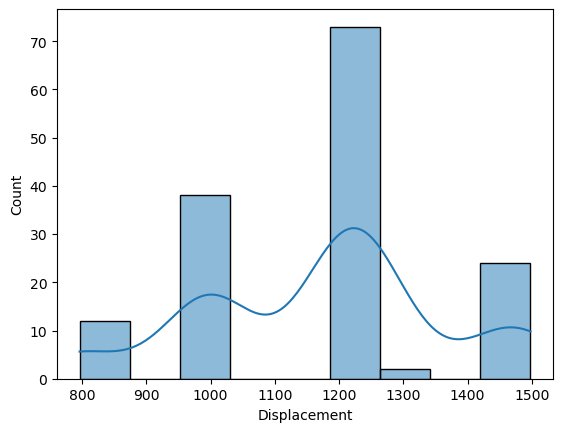

In [12]:
sb.histplot(data[data['Make']=='Suzuki']['Displacement'],kde=True)
plt.show;

<AxesSubplot:xlabel='Displacement', ylabel='Count'>

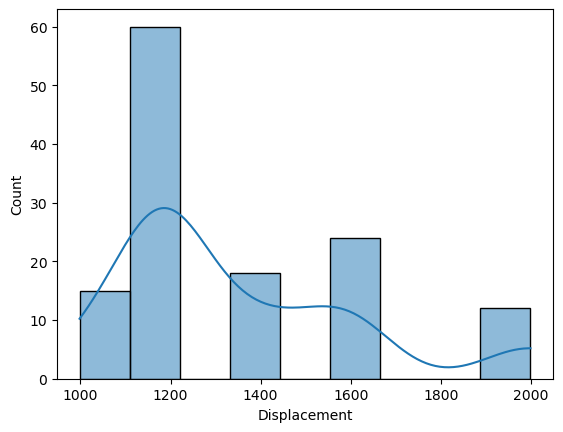

In [13]:
sb.histplot(data[data['Make']=='Hyundai']['Displacement'],kde=True)

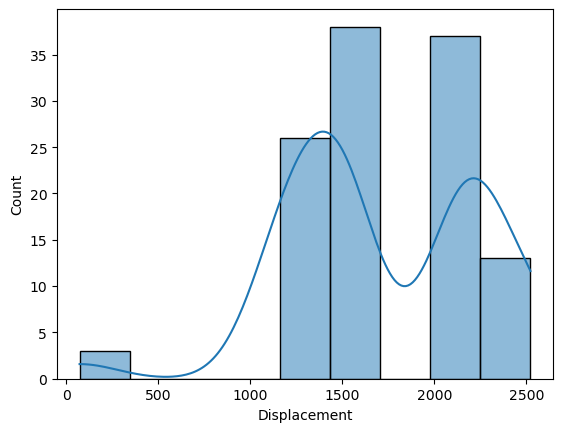

In [14]:
sb.histplot(data[data['Make']=='Mahindra']['Displacement'],kde=True)
plt.show()


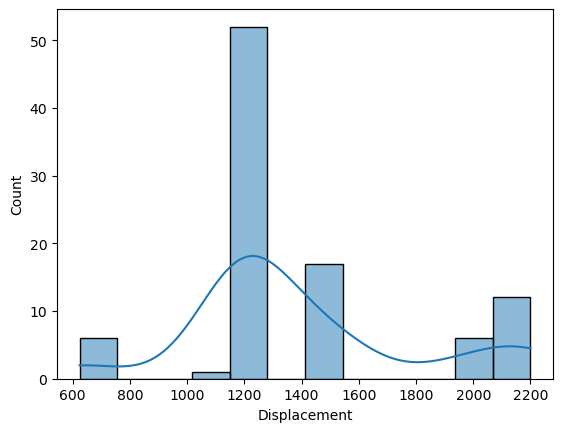

In [15]:
sb.histplot(data[data['Make']=='Tata']['Displacement'],kde=True)
plt.show()

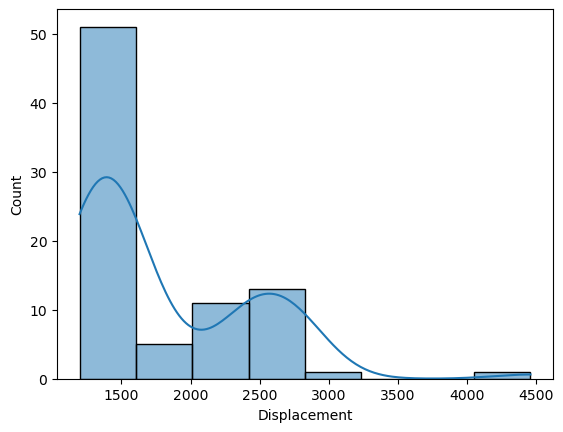

In [16]:
sb.histplot(data[data['Make']=='Toyota']['Displacement'],kde=True)
plt.show()

# task 2

In [17]:
#factors affectingthe mileage of the car and visually present the approprate chart and group by datasetwith make 
#draw the correlation graphof milage of the car 
data['avg_mileage']=data.City_Mileage_km_litre+ data.Highway_Mileage_km_litre/2

In [18]:
n=data[data['Make'].notnull()]

In [19]:
n.groupby('Make')[['Cylinders','Displacement']].mean()

,Cylinders,Displacement
Make,,
Aston Martin,10.666667,5038.333333
Audi,5.161290,2256.354839
Bajaj,NaN,216.000000
Bentley,10.666667,5447.833333
Bmw,5.459459,2707.918919
Bugatti,16.000000,7993.000000
Datsun,3.000000,1065.066667
Dc,4.000000,2000.000000
Ferrari,8.500000,4589.500000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_mileage', ylabel='Cylinders'>

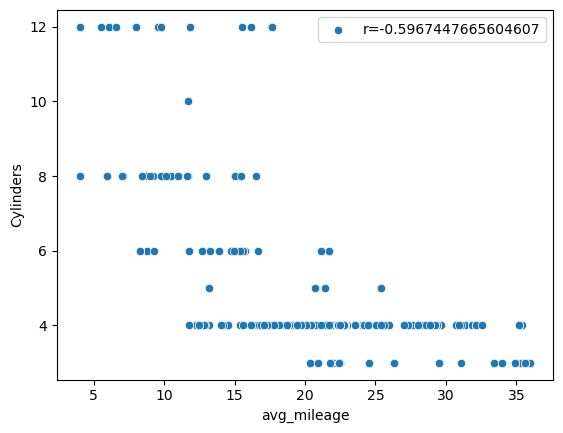

In [27]:
sb.scatterplot(data['avg_mileage'],(data['Cylinders']),label="r={}".format((data['avg_mileage'].corr(data['Cylinders']))))